In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('./data/placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
df.shape

(100, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [11]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'IQ')

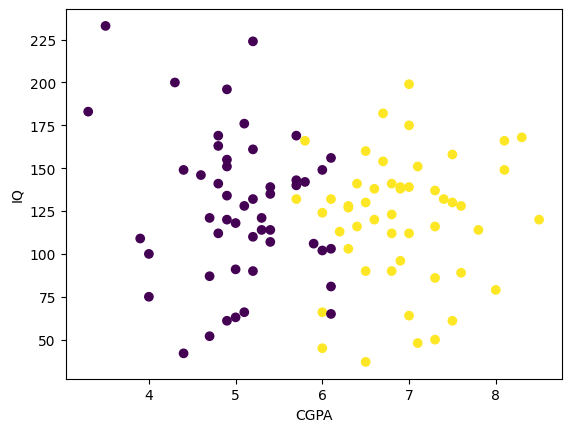

In [15]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')

In [25]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [26]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [27]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X = scaler.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [50]:
clf.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import  accuracy_score

In [53]:
acc = accuracy_score(y_test,y_pred)
acc

0.85

In [60]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

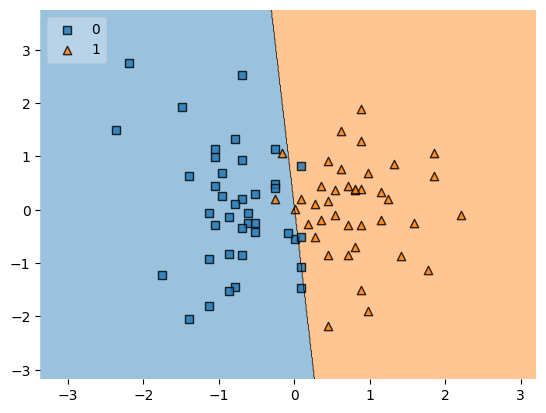

In [63]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [64]:
import pickle

In [66]:
pickle.dump(clf,open('model.pkl','wb'))